In [2]:
from sklearn.datasets import load_iris
data = load_iris()

data.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

iris = pd.DataFrame(data=data.data, columns=data.feature_names)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


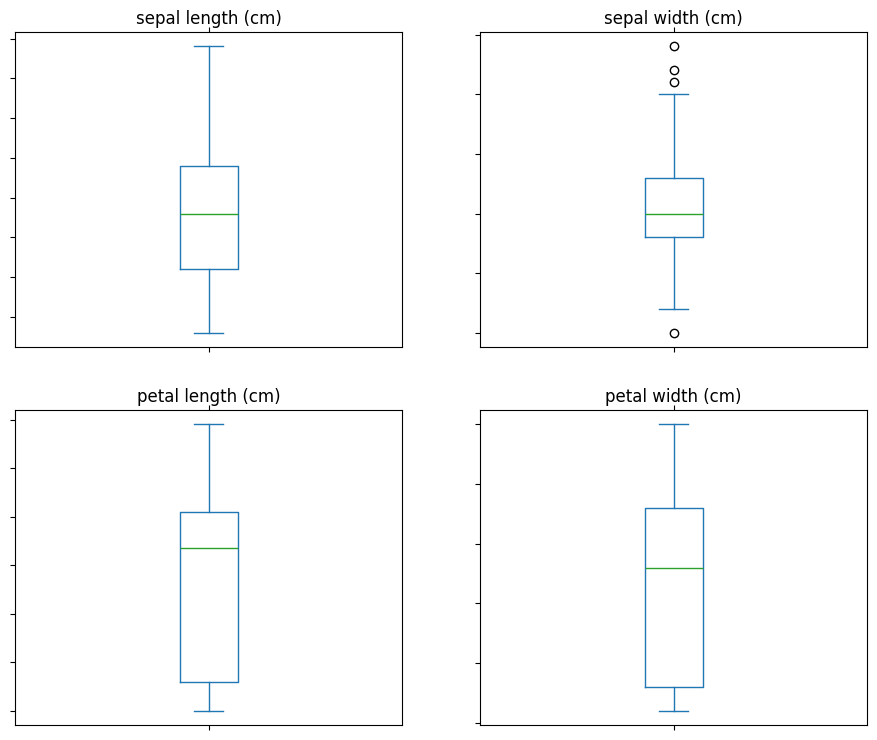

In [6]:
#Visualizar de estadisticas basicas y de valores atipicos 
def boxplot_iris(feature_names, dataset):
    """"""
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2, 2, i)
        plt.axis('on')
        plt.tick_params(axis = 'both', left=True,
                        top=True, right=False,
                        bottom=True, labelleft=False, 
                        labeltop=False, labelright=False,
                        labelbottom=False            
        )
        dataset[col].plot(kind='box', subplots=True, sharex=False)
        plt.title(col)
        i += 1
    plt.show()
    
boxplot_iris(iris.columns[:], iris)

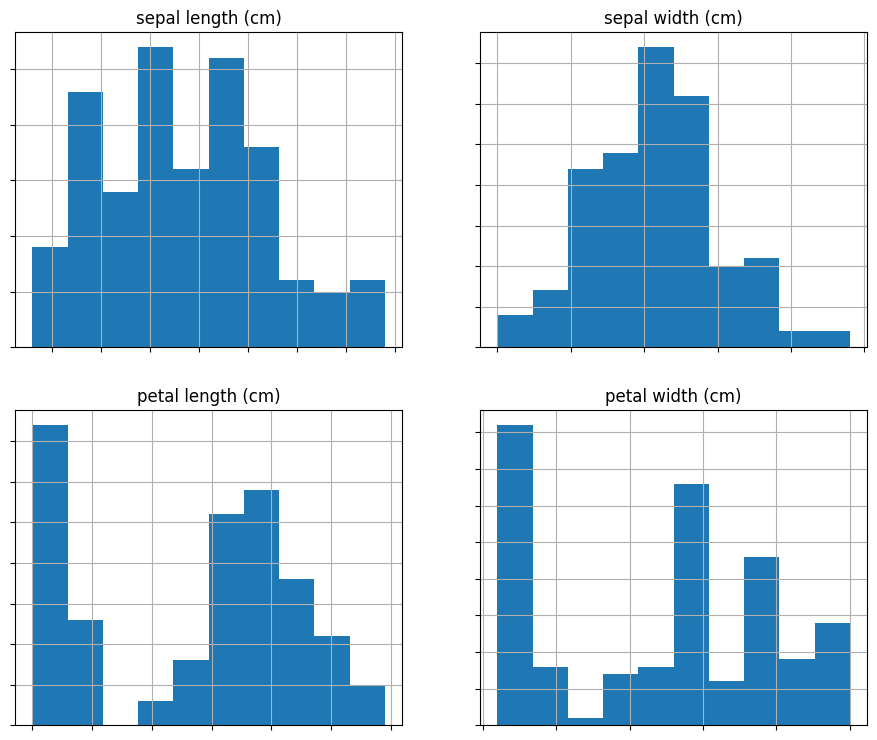

In [7]:
def histogram_iris(feature_names, dataset):
    """"""
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2, 2, i )
        plt.axis('on')
        plt.tick_params(axis = 'both', left=True,
                        top=False, right=False,
                        bottom=True, labelleft=False, 
                        labeltop=False, labelright=False,
                        labelbottom=False            
        )
        dataset[col].hist()
        plt.title(col)
        i += 1
plt.show()
histogram_iris(iris.columns[:], iris)



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = iris
y = data.target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [10]:
model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None, 
    min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None,
    random_state=42, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, class_weight=None
)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [12]:
model.score(X_test, y_test)

0.98

In [13]:
# Importa la biblioteca numpy para operaciones numéricas.
import numpy as np

# Importa funciones para realizar validación cruzada y dividir datos.
from sklearn.model_selection import cross_val_score, KFold

# Configura un objeto de validación cruzada con 10 particiones (folds) y mezcla aleatoria.
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada para el modelo usando los datos de entrenamiento.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas en la validación cruzada.
fin_result = np.mean(results)

# Itera sobre las puntuaciones y las imprime con el índice de la iteración.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de las puntuaciones de validación cruzada.
print(f'Puntuación final de la validación cruzada: {fin_result:.2f}')

0th puntuación de validación cruzada : 0.9
1st puntuación de validación cruzada : 1.0
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 1.0
4th puntuación de validación cruzada : 0.8
5th puntuación de validación cruzada : 0.9
6th puntuación de validación cruzada : 1.0
7th puntuación de validación cruzada : 0.9
8th puntuación de validación cruzada : 1.0
9th puntuación de validación cruzada : 1.0
Puntuación final de la validación cruzada: 0.93


In [14]:
# Importa StratifiedKFold para asegurar que cada fold tenga la misma proporción de clases.
from sklearn.model_selection import StratifiedKFold

# Configura StratifiedKFold con 10 particiones y mezcla aleatoria.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada estratificada.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas.
fin_result = np.mean(results)

# Imprime las puntuaciones para cada fold y su índice.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de validación cruzada estratificada.
print(f'Puntuación final de validación cruzada estratificada : {fin_result}')

0th puntuación de validación cruzada : 0.9
1st puntuación de validación cruzada : 0.9
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 0.9
4th puntuación de validación cruzada : 1.0
5th puntuación de validación cruzada : 1.0
6th puntuación de validación cruzada : 0.9
7th puntuación de validación cruzada : 0.8
8th puntuación de validación cruzada : 1.0
9th puntuación de validación cruzada : 1.0
Puntuación final de validación cruzada estratificada : 0.9199999999999999


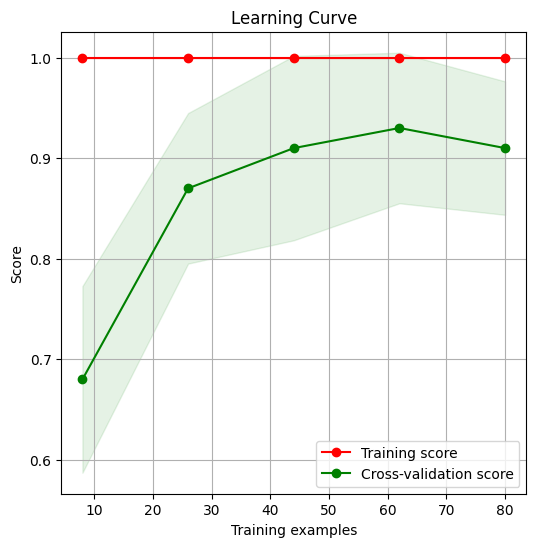

In [15]:
# Importa la librería scikit-plot para generar gráficos relacionados con el aprendizaje automático.
from scipy import interpolate

import scikitplot as skplt
# Importa matplotlib para la creación de gráficos.
import matplotlib.pyplot as plt
# Genera y muestra una curva de aprendizaje para el modelo.
skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
plt.show()

In [16]:
model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None,
    min_samples_split= 2, min_samples_leaf=1,
    min_weight_fraction_leaf=0.0, max_features=None,
    random_state=42, max_leaf_nodes=None, 
    min_impurity_decrease=0.0, class_weight=None
)

In [17]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
parameter = {
    'max_depth' : [4, 6, 8, 10, 12],
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3],
    'random_state' : [7, 23, 42, 78, 142],
    'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2]
}

model2 = GridSearchCV(estimator=estimator, param_grid=parameter, cv=KFold(10), verbose=1, n_jobs=-1, refit=True)
model2.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [18]:
# precision
print("Precision")
from sklearn.metrics import precision_score
precisions = precision_score(y_test, model2.predict(X_test), average=None)

for target, score, in zip(data.target_names, precisions):
  print(f"{target} precisión: {score}")

Precision
setosa precisión: 1.0
versicolor precisión: 0.9375
virginica precisión: 1.0


In [19]:
from sklearn.metrics import recall_score
recalls = recall_score(y_test, model2.predict(X_test), average=None)
for target, score in zip(data.target_names, recalls):
    print(f"{target} sensibilidad: {score}")

setosa sensibilidad: 1.0
versicolor sensibilidad: 1.0
virginica sensibilidad: 0.9375


In [20]:
print("F-SCORE")
#f-score
from sklearn.metrics import fbeta_score, f1_score
fbetas = fbeta_score(y_test, model2.predict(X_test), beta=1, average=None)
for target, score in zip(data.target_names, fbetas):
    print(f"{target} fbeta score: {score}")
    f1s = f1_score(y_test, model2.predict(X_test), average=None)
for target, score in zip(data.target_names, f1s):
    print(f"{target} f1 puntuación: {score}")

F-SCORE
setosa fbeta score: 1.0
versicolor fbeta score: 0.967741935483871
virginica fbeta score: 0.967741935483871
setosa f1 puntuación: 1.0
versicolor f1 puntuación: 0.967741935483871
virginica f1 puntuación: 0.967741935483871


In [21]:
print("Exactitud")

Exactitud


In [22]:
print("INFORME DE CLASIFICACION")
#informe de clasificación
from sklearn.metrics import classification_report
print(classification_report(y_test, model2.predict(X_test)))

INFORME DE CLASIFICACION
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [23]:
pred_proba = model2.predict_proba(X_test)
pred_proba

array([[0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.0625    , 0.9375    ],
       [1.

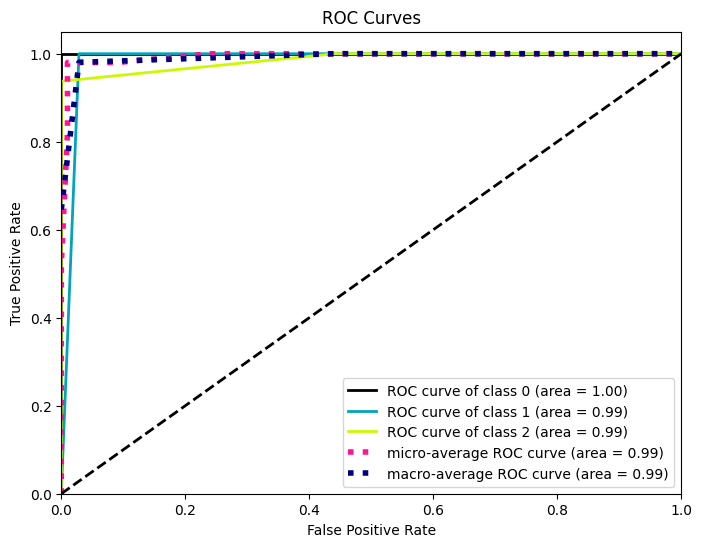

In [24]:
import scikitplot as skpl
skpl.metrics.plot_roc(y_test, pred_proba, figsize=(8,6))
plt.show()

In [25]:
model.fit(iris.iloc[:, :-1], iris.iloc[:, -1])

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
import pickle

In [ ]:
with open("final_model.pickle", "wb") as fp:
    pickle.dump(model2, fp)

In [ ]:
f = open("final_model.pickle", "rb")
model3 = pickle.load(f)

In [ ]:
predicted_species = model3.predict(iris.iloc[:, :-1])
iris['predicted_species'] = predicted_species
iris.to_csv("FinalResult.csv", index=False)